<a href="https://colab.research.google.com/github/jack-cao-623/peloton_workouts/blob/main/peloton_workouts_thru_2025_04_13.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Set up

In [117]:
# libraries needed
import numpy as pd
import pandas as pd

# static plots
import seaborn as sns
import matplotlib.pyplot as plt

# interactive plots
import plotly.express as px

# ggplot style
from plotnine import *

In [8]:
# import data
url = 'https://raw.githubusercontent.com/jack-cao-623/peloton_workouts/refs/heads/main/jcao623_workouts_2025_04_13.csv'

df = pd.read_csv(url)

df.head()

,Workout Timestamp,Live/On-Demand,Instructor Name,Length (minutes),Fitness Discipline,Type,Title,Class Timestamp,Total Output,Avg. Watts,Avg. Resistance,Avg. Cadence (RPM),Avg. Speed (mph),Distance (mi),Calories Burned,Avg. Heartrate,Avg. Incline,Avg. Pace (min/mi)
0,2022-01-16 07:36 (PDT),On Demand,Andy Speer,30.0,Strength,Upper Body,30 min Upper Body Strength,2022-01-10 10:23 (PDT),NaN,NaN,NaN,NaN,NaN,NaN,149.0,NaN,NaN,NaN
1,2022-01-17 08:13 (PDT),On Demand,Olivia Amato,5.0,Stretching,Post-Run Stretch,5 min Post-Run Stretch,2022-01-07 07:00 (PDT),NaN,NaN,NaN,NaN,NaN,NaN,12.0,NaN,NaN,NaN
2,2022-01-20 07:06 (PDT),On Demand,Rad Lopez,20.0,Strength,Upper Body,20 min Arms & Shoulders Strength,2022-01-19 05:20 (PDT),NaN,NaN,NaN,NaN,NaN,NaN,100.0,NaN,NaN,NaN
3,2022-02-04 17:05 (-08),On Demand,Robin Arzon,20.0,Cycling,Beginner,20 min Beginner Ride,2021-12-28 08:00 (-08),88.0,73.0,33%,79.0,14.03,4.68,96.0,94.0,NaN,NaN
4,2022-02-05 08:35 (-08),On Demand,Alex Toussaint,5.0,Cycling,Warm Up,5 min AT's Ride to Greatness: Warm Up,2022-02-03 12:00 (-08),42.0,139.0,43%,84.0,18.44,1.54,43.0,120.0,NaN,NaN


In [17]:
# view metadata
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1501 entries, 0 to 1500
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   workout_timestamp      1501 non-null   object 
 1   live_on_demand         1489 non-null   object 
 2   instructor_name        1478 non-null   object 
 3   length_in_minutes      1498 non-null   float64
 4   fitness_discipline     1501 non-null   object 
 5   type                   1489 non-null   object 
 6   title                  1501 non-null   object 
 7   class_timestamp        1470 non-null   object 
 8   total_output           712 non-null    float64
 9   avg_watts              712 non-null    float64
 10  avg_resistance         712 non-null    object 
 11  avg_cadence_rpm        712 non-null    float64
 12  avg_speed_mph          712 non-null    float64
 13  distance_in_miles      712 non-null    float64
 14  calories_burned        1500 non-null   float64
 15  avg_

In [9]:
# rename columns

# from
print("from:\n")
print(df.columns)

# rename
df.columns = [
    'workout_timestamp'
    , 'live_on_demand'
    , 'instructor_name'
    , 'length_in_minutes'
    , 'fitness_discipline'
    , 'type'
    , 'title'
    , 'class_timestamp'
    , 'total_output'
    , 'avg_watts'
    , 'avg_resistance'
    , 'avg_cadence_rpm'
    , 'avg_speed_mph'
    , 'distance_in_miles'
    , 'calories_burned'
    , 'avg_heartrate'
    , 'avg_incline'
    , 'avg_pace_min_per_mile'
]

# to
print("\n\nto:\n")
print(df.columns)

from:

Index(['Workout Timestamp', 'Live/On-Demand', 'Instructor Name',
       'Length (minutes)', 'Fitness Discipline', 'Type', 'Title',
       'Class Timestamp', 'Total Output', 'Avg. Watts', 'Avg. Resistance',
       'Avg. Cadence (RPM)', 'Avg. Speed (mph)', 'Distance (mi)',
       'Calories Burned', 'Avg. Heartrate', 'Avg. Incline',
       'Avg. Pace (min/mi)'],
      dtype='object')


to:

Index(['workout_timestamp', 'live_on_demand', 'instructor_name',
       'length_in_minutes', 'fitness_discipline', 'type', 'title',
       'class_timestamp', 'total_output', 'avg_watts', 'avg_resistance',
       'avg_cadence_rpm', 'avg_speed_mph', 'distance_in_miles',
       'calories_burned', 'avg_heartrate', 'avg_incline',
       'avg_pace_min_per_mile'],
      dtype='object')


In [21]:
# create new called called workout_date, which is just the data part of workout_timestamp

df['workout_date'] = (

     df['workout_timestamp']
      # first 10 characters: YYYY-MM-DD
      .str[:10]

      # convert to date
      .pipe(pd.to_datetime)

)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1501 entries, 0 to 1500
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   workout_timestamp      1501 non-null   object        
 1   live_on_demand         1489 non-null   object        
 2   instructor_name        1478 non-null   object        
 3   length_in_minutes      1498 non-null   float64       
 4   fitness_discipline     1501 non-null   object        
 5   type                   1489 non-null   object        
 6   title                  1501 non-null   object        
 7   class_timestamp        1470 non-null   object        
 8   total_output           712 non-null    float64       
 9   avg_watts              712 non-null    float64       
 10  avg_resistance         712 non-null    object        
 11  avg_cadence_rpm        712 non-null    float64       
 12  avg_speed_mph          712 non-null    float64       
 13  dis

# Cumulative workouts over time

In [26]:
# cumulative workouts over time
df_date_of = pd.DataFrame(

    {'date_of': pd.date_range(

        # date of earliest workout
        start = df['workout_date'].min()

        # date of most recent workout
        , end = df['workout_date'].max()

        # by days
        , freq = 'D'
    )
    }

)

df_date_of.head()

# add columns showing number of workouts on date_of and cumulative up until that date_of

,date_of
0,2022-01-16
1,2022-01-17
2,2022-01-18
3,2022-01-19
4,2022-01-20


<Axes: xlabel='date_of'>

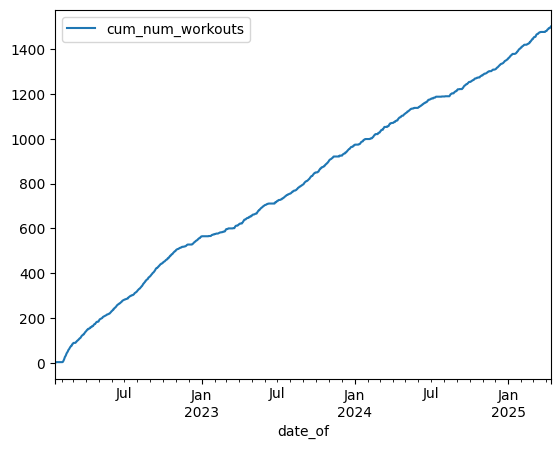

In [45]:
(
    # one row per date_of: from earliest to most recent workout date in increments of 1 day
    df_date_of
      .merge(

          # one row per workout_date; number of workouts on each workout_date
          right = (
              df
                .groupby(['workout_date'])
                .size()
                .reset_index(name = 'num_workouts')
          )

          # left join
          , how = 'left'
          , left_on = 'date_of'
          , right_on = 'workout_date'
      )

      # select these columns
      [['date_of', 'num_workouts']]

      # replace NaN with 0
      .fillna(0)

      # create new column showing cumulative number of workouts
      .assign(
        cum_num_workouts = lambda x: x['num_workouts'].cumsum()
      )

      # visualize
      .plot(x = 'date_of', y = 'cum_num_workouts', kind = 'line')
)

In [78]:
# don't need left join full

(

  # number of workouts per day
  df
    .groupby(['workout_date'])
    .size()
    .reset_index(name = 'num_workouts')

  # create new column showing cumulative number of workouts
    .assign(
        cum_num_workouts = lambda x: x['num_workouts'].cumsum()
    )

  # visualize
    .pipe(
          lambda x:px.line(
              data_frame = x
              , x = 'workout_date'
              , y = 'cum_num_workouts'
              , markers = False
            )
    )

)

# Cumulative workouts over time - cut by discipline

In [79]:
# number of workouts by workout_date and fitness_discipline, excluding Yoga

(
    df
      # exclude Yoga; just 1 Yoga workout
      .query("fitness_discipline != 'Yoga'")

      # one row per fitness_discipline per workout_date
      .groupby(['fitness_discipline', 'workout_date'])

      # number of workouts
      .size()

      # tidy dataframe
      .reset_index(name = 'num_workouts')
      .sort_values(['fitness_discipline', 'workout_date'])

      # new column showing cumulative number of workouts, cut by discipline
      .assign(
          cum_workouts = lambda x: x.groupby(['fitness_discipline'])['num_workouts'].cumsum()
      )

    # visualize
      .pipe(
            lambda x:px.line(
                data_frame = x
                , x = 'workout_date'
                , y = 'cum_workouts'
                , color = 'fitness_discipline'
                , markers = False
              )
      )

)

In [47]:
(
    df
      .groupby(['fitness_discipline'])
      .size()
      .reset_index(name = 'num_workouts')
)

# exclude 'Yoga': only 1 workout

,fitness_discipline,num_workouts
0,Cycling,712
1,Strength,364
2,Stretching,424
3,Yoga,1


In [ ]:
(

  # number of workouts per day
  df
    .groupby(['workout_date'])
    .size()
    .reset_index(name = 'num_workouts')

  # create new column showing cumulative number of workouts
    .assign(
        cum_num_workouts = lambda x: x['num_workouts'].cumsum()
    )

  # visualize
    .pipe(
          lambda x:px.line(
              data_frame = x
              , x = 'workout_date'
              , y = 'cum_num_workouts'
            )
    )

)

<Axes: xlabel='workout_date', ylabel='cum_workouts'>

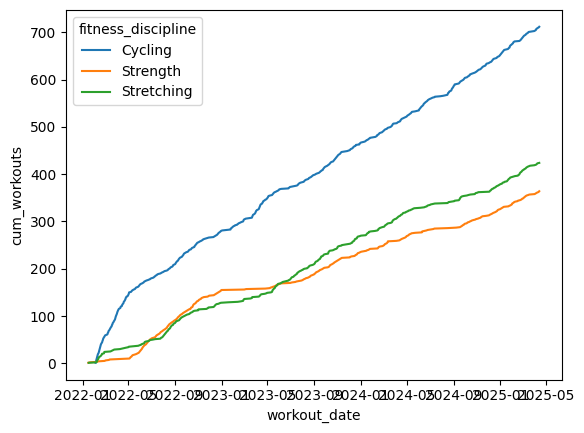

In [67]:
# number of workouts by workout_date and fitness_discipline, excluding Yoga

(
    df
      # exclude Yoga; just 1 Yoga workout
      .query("fitness_discipline != 'Yoga'")

      # one row per fitness_discipline per workout_date
      .groupby(['fitness_discipline', 'workout_date'])

      # number of workouts
      .size()

      # tidy dataframe
      .reset_index(name = 'num_workouts')
      .sort_values(['fitness_discipline', 'workout_date'])

      # new column showing cumulative number of workouts, cut by discipline
      .assign(
          cum_workouts = lambda x: x.groupby(['fitness_discipline'])['num_workouts'].cumsum()
      )

      .pipe(
          lambda x:sns.lineplot(
              data = x
              , x = 'workout_date'
              , y = 'cum_workouts'
              , hue = 'fitness_discipline'
            )
          )
)

# Top cycling instructors

In [93]:
(
    df

      # filter to Cycling workouts only
      .query("fitness_discipline == 'Cycling'")

      # per instructor, number of workouts, total minutes, and total miles
      .groupby(['instructor_name'])
      .agg(
          num_cycling_workouts = ('instructor_name', 'count')
          , total_minutes = ('length_in_minutes', 'sum')
          , total_miles = ('distance_in_miles', 'sum')
      )
      .reset_index()

      # visualize
      .pipe(
          lambda x:px.scatter(
              data_frame = x
              , x = 'num_cycling_workouts'
              , y = 'total_minutes'
              , size = 'total_miles'
              , color = 'instructor_name'
        )
      )
)

# Cumulative cylcing workouts - cut by instructor (top) only

In [99]:
# from chart above, top instructors: 40+ workouts

top_instructors = [
    'Cody Rigsby'
    , 'Hannah Frankson'
    , 'Ben Alldis'
    , 'Bradley Rose'
    , 'Alex Toussaint'
    , 'Emma Lovewell'
    , 'Hannah Corbin'
    , 'Leanne Hainsby-Aldis'
]


In [100]:
(
    df
      # Cycling workouts
      .query("fitness_discipline == 'Cycling'")

      # taught by top instructors
      .query("instructor_name in @top_instructors")

      # number of workouts per instructor per day
      .groupby(['instructor_name', 'workout_date'])
      .size()
      .reset_index(name = 'num_workouts')

      # cumulative sum per instructor
      .sort_values(['instructor_name', 'workout_date'])
      .assign(
          cum_workouts = lambda x: x.groupby(['instructor_name'])['num_workouts'].cumsum()
      )

      # visualize
      .pipe(
          lambda x:px.line(
              data_frame = x
              , x = 'workout_date'
              , y = 'cum_workouts'
              , color = 'instructor_name'
              , markers = False
            )
      )
)

# Workout time

In [113]:
# hour of the workout (e.g., 04 = 4am hour, 13 = 1pm hour)
df['workout_hour'] = (

    df['workout_timestamp']

      # extract hour
      .str[11:13]

)

# day of the workout (Mon, Tue, Wed, etc.)
df['workout_day_of_week'] = (

    df['workout_date']
      .dt.day_name()
)


,workout_timestamp,live_on_demand,instructor_name,length_in_minutes,fitness_discipline,type,title,class_timestamp,total_output,avg_watts,...,avg_cadence_rpm,avg_speed_mph,distance_in_miles,calories_burned,avg_heartrate,avg_incline,avg_pace_min_per_mile,workout_date,workout_hour,workout_day_of_week
0,2022-01-16 07:36 (PDT),On Demand,Andy Speer,30.0,Strength,Upper Body,30 min Upper Body Strength,2022-01-10 10:23 (PDT),NaN,NaN,...,NaN,NaN,NaN,149.0,NaN,NaN,NaN,2022-01-16,07,Sunday
1,2022-01-17 08:13 (PDT),On Demand,Olivia Amato,5.0,Stretching,Post-Run Stretch,5 min Post-Run Stretch,2022-01-07 07:00 (PDT),NaN,NaN,...,NaN,NaN,NaN,12.0,NaN,NaN,NaN,2022-01-17,08,Monday
2,2022-01-20 07:06 (PDT),On Demand,Rad Lopez,20.0,Strength,Upper Body,20 min Arms & Shoulders Strength,2022-01-19 05:20 (PDT),NaN,NaN,...,NaN,NaN,NaN,100.0,NaN,NaN,NaN,2022-01-20,07,Thursday
3,2022-02-04 17:05 (-08),On Demand,Robin Arzon,20.0,Cycling,Beginner,20 min Beginner Ride,2021-12-28 08:00 (-08),88.0,73.0,...,79.0,14.03,4.68,96.0,94.0,NaN,NaN,2022-02-04,17,Friday
4,2022-02-05 08:35 (-08),On Demand,Alex Toussaint,5.0,Cycling,Warm Up,5 min AT's Ride to Greatness: Warm Up,2022-02-03 12:00 (-08),42.0,139.0,...,84.0,18.44,1.54,43.0,120.0,NaN,NaN,2022-02-05,08,Saturday


In [147]:
# create dataframe
df_num_workouts_per_discipline_per_day_per_hour = (

    df

      # exclude Yoga, just 1 workout
      .query("fitness_discipline != 'Yoga'")

      # number of workouts per discpline per day per hour
      .groupby(['fitness_discipline', 'workout_day_of_week', 'workout_hour'])
      .size()
      .reset_index(name = 'num_workouts')
      .sort_values(by = ['fitness_discipline', 'workout_day_of_week', 'workout_hour'])

      # convert workout_hour to numeric
      .assign(
          workout_hour = lambda x: pd.to_numeric(x['workout_hour'])
      )

)

df_num_workouts_per_discipline_per_day_per_hour

,fitness_discipline,workout_day_of_week,workout_hour,num_workouts
0,Cycling,Friday,5,2
1,Cycling,Friday,6,17
2,Cycling,Friday,7,17
3,Cycling,Friday,8,14
4,Cycling,Friday,9,1
...,...,...,...,...
211,Stretching,Wednesday,7,3
212,Stretching,Wednesday,8,1
213,Stretching,Wednesday,19,5
214,Stretching,Wednesday,20,19


In [150]:
# all combinations of disciplines, days of the week, and hours
df_discipline_day_hour = (
    pd.MultiIndex.from_product(
        [
            ['Cycling', 'Strength', 'Stretching']
            , ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
            , list(range(0, 24))
        ]
        , names = ['fitness_discipline', 'workout_day_of_week', 'workout_hour']
    )
)

df_discipline_day_hour

MultiIndex([(   'Cycling',   'Sunday',  0),
            (   'Cycling',   'Sunday',  1),
            (   'Cycling',   'Sunday',  2),
            (   'Cycling',   'Sunday',  3),
            (   'Cycling',   'Sunday',  4),
            (   'Cycling',   'Sunday',  5),
            (   'Cycling',   'Sunday',  6),
            (   'Cycling',   'Sunday',  7),
            (   'Cycling',   'Sunday',  8),
            (   'Cycling',   'Sunday',  9),
            ...
            ('Stretching', 'Saturday', 14),
            ('Stretching', 'Saturday', 15),
            ('Stretching', 'Saturday', 16),
            ('Stretching', 'Saturday', 17),
            ('Stretching', 'Saturday', 18),
            ('Stretching', 'Saturday', 19),
            ('Stretching', 'Saturday', 20),
            ('Stretching', 'Saturday', 21),
            ('Stretching', 'Saturday', 22),
            ('Stretching', 'Saturday', 23)],
           names=['fitness_discipline', 'workout_day_of_week', 'workout_hour'], length=504)

In [153]:
# complete dataset with 0s for missing rows
df_num_workouts_per_discipline_per_day_per_hour = (
    df_num_workouts_per_discipline_per_day_per_hour
      .set_index(['fitness_discipline', 'workout_day_of_week', 'workout_hour'])
      .reindex(df_discipline_day_hour, fill_value = 0)
      .reset_index()
)

In [161]:
# reorder workout_day_of_week
df_num_workouts_per_discipline_per_day_per_hour['workout_day_of_week'] = (
    pd.Categorical(
        df_num_workouts_per_discipline_per_day_per_hour['workout_day_of_week']
        , categories = ['Saturday', 'Friday', 'Thursday', 'Wednesday', 'Tuesday', 'Monday', 'Sunday']
        , ordered = True
    )
)

# examine
df_num_workouts_per_discipline_per_day_per_hour.head()

,fitness_discipline,workout_day_of_week,workout_hour,num_workouts
0,Cycling,Sunday,0,0
1,Cycling,Sunday,1,0
2,Cycling,Sunday,2,0
3,Cycling,Sunday,3,0
4,Cycling,Sunday,4,0


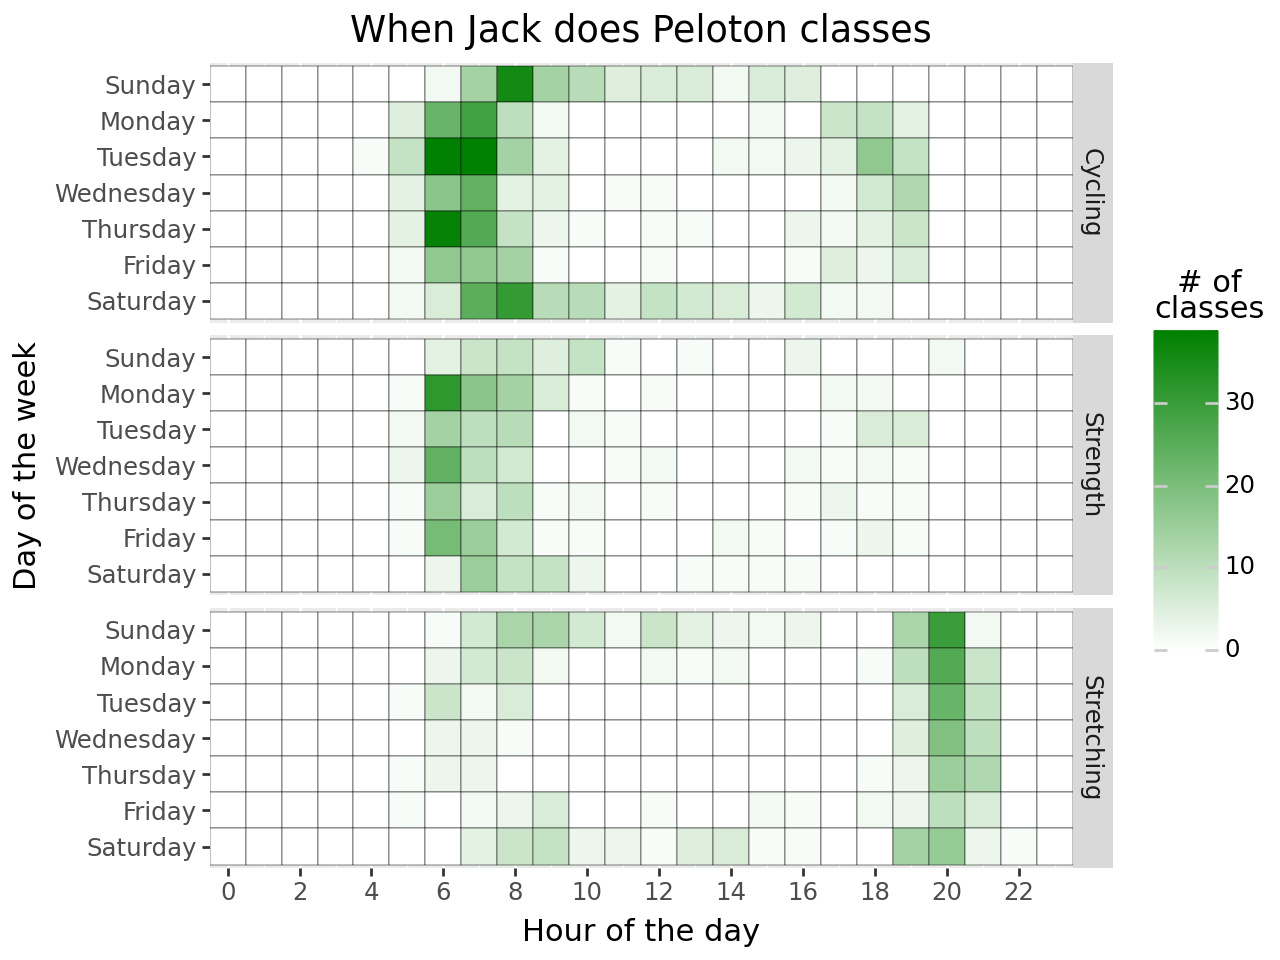

In [165]:
(
    ggplot(
        df_num_workouts_per_discipline_per_day_per_hour
        , aes('workout_hour', 'workout_day_of_week', fill = 'num_workouts')
    )
      + facet_grid(rows = 'fitness_discipline')
      + geom_tile(color = 'black')
      + scale_x_continuous(breaks = range(0, 25, 2), expand = (0, 0))
      + scale_fill_gradient2(low = "white", high = "green")
      + labs(x = 'Hour of the day', y = 'Day of the week', fill = '# of\nclasses', title = 'When Jack does Peloton classes')
)
